In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import glob
import string
import re
import pymorphy3
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


pio.renderers.default = "notebook"  
nltk.download('punkt_tab') 
nltk.download('stopwords') 

[nltk_data] Downloading package punkt_tab to /Users/aror/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aror/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('PDF_dataset.csv')

df

NameCompany   Rating DataPublish  \
0                  14    15.00  04.05.2025   
1           RUVDS.com  2394.92  20.03.2025   
2   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú     6.00  04.05.2025   
3          –í—Å–µ –ø–æ—Ç–æ–∫–∏  2393.91         NaN   
4   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú    85.00  04.05.2025   
5              353.18     4.58  04.05.2025   
6       red_mad_robot   117.94  04.05.2025   
7           RUVDS.com  2394.92         NaN   
8   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú   107.00  04.05.2025   
9                  22     0.00  20.03.2025   
10  –ö–æ–Ω–∫—É—Ä—Å —Ä–∞—Å—Å–∫–∞–∑–æ–≤   466.00  04.05.2025   
11                –ú–æ—è     5.00  04.05.2025   
12          RUVDS.com  2376.90  04.05.2025   
13             280.79     4.29  04.05.2025   
14       –ò–∑ –ø–µ—Å–æ—á–Ω–∏—Ü—ã   552.00  04.05.2025   
15            Cloud4Y    71.07  04.05.2025   
16         –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫   404.32  04.05.2025   
17                  2     5.00  04.05.2025   
18  –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú   419.00  04.05.2025   
19      –ß–ò–¢–ê–Æ–¢ –°–ï–ô–ß–ê–°    26.00  04.05.2025   
20          RUVDS.com  2394.92  20.03.2025   
21               √Ünix    41.74  04.05.2025   
22            Cloud4Y    71.07  04.05.2025   
23             414.35     4.74  04.05.2025   

                                         Activity  \
0                                         –†–µ–π—Ç–∏–Ω–≥   
1      VDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥—É HABR15   
2              –õ—É—á—à–∏–µ –ò–¢-—Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª–∏ –†–æ—Å—Å–∏–∏ 2023   
3                   IT-–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞   
4                             –ó–∞—Ä–ø–ª–∞—Ç—ã –∞–π—Ç–∏—à–Ω–∏–∫–æ–≤   
5                                         –†–µ–π—Ç–∏–Ω–≥   
6    ‚Ññ1 –≤ —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–µ —Ü–∏—Ñ—Ä–æ–≤—ã—Ö —Ä–µ—à–µ–Ω–∏–π –¥–ª—è –±–∏–∑–Ω–µ—Å–∞   
7                   IT-–∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞   
8                        –ó–∞—Ä–ø–ª–∞—Ç—ã IT-—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤   
9                               –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú   
10  –û—Ç–∫—Ä—ã–≤–∞–µ–º —Å–µ–∑–æ–Ω —Ñ—É—Ç—É—Ä–æ–ª–æ–≥–∏–∏ —Å –∫—Ä—É—Ç—ã–º–∏ –ø—Ä–∏–∑–∞–º–∏   
11                                          –ª–µ–Ω—Ç–∞   
12     VDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥—É HABR15   
13                                        –†–µ–π—Ç–∏–Ω–≥   
14                                        –ü–µ—Ä–µ–≤–æ–¥   
15            #1 –ö–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–π –æ–±–ª–∞—á–Ω—ã–π –ø—Ä–æ–≤–∞–π–¥–µ—Ä   
16      –õ—É—á—à–∏–π –º–æ–±–∏–ª—å–Ω—ã–π –±–∞–Ω–∫ –ø–æ –≤–µ—Ä—Å–∏–∏ Markswebb   
17                                        –†–µ–π—Ç–∏–Ω–≥   
18                            –ó–∞—Ä–ø–ª–∞—Ç—ã –∞–π—Ç–∏—à–Ω–∏–∫–æ–≤   
19               –ö–∞–∫ –º—ã –ø–µ—Ä–µ–Ω–µ—Å–ª–∏ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–æ –∏–∑   
20     VDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥—É HABR15   
21                                    –ü–æ–¥–ø–∏—Å–∞—Ç—å—Å—è   
22            #1 –ö–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–π –æ–±–ª–∞—á–Ω—ã–π –ø—Ä–æ–≤–∞–π–¥–µ—Ä   
23                                        –†–µ–π—Ç–∏–Ω–≥   

                                          TextArticle  
0   –ö–ê–ö –°–¢–ê–¢–¨ –ê–í–¢–û–†–û–ú\n\n–ò–¥–µ—è\n–ê –ø–æ—á–µ–º—É –±—ã –Ω–µ –∏—Å–ø–æ...  
1   –°—Ä–µ–¥–Ω–∏–π19 –º–∏–Ω\nartyomsoft\n–ö–∞–∫ —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç...  
2   –ù–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è Yandex N.V. –ø–æ¬†–∏—Ç–æ–≥–∞–º —Ä...  
3   RUVDS.com\nVDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥—É...  
4   –ü—Ä–∏–≤–µ—Ç! –ú–µ–Ω—è –∑–æ–≤—É—Ç –î–µ–Ω–∏—Å, —è –∑–∞–Ω–∏–º–∞—é—Å—å –∫–æ–º–º–µ—Ä—á–µ...  
5   –≠–∫–æ—Å–∏—Å—Ç–µ–º–∞ –¥–ª—è —Ä–∞–∑–≤–∏—Ç–∏—è –ª—é–¥–µ–π, –≤–æ–≤–ª–µ—á–µ–Ω–Ω—ã—Ö –≤ I...  
6   –°—Ä–µ–¥–Ω–∏–π18 –º–∏–Ω\nredmadrobot\nCocoapods, Carthag...  
7   –í—Å–µ –ø–æ—Ç–æ–∫–∏\nVDS/VPS-—Ö–æ—Å—Ç–∏–Ω–≥. –°–∫–∏–¥–∫–∞ 15% –ø–æ –∫–æ–¥...  
8   –ú–∏—Ç—á–µ–ª–ª –ë–µ–π–∫–µ—Ä, –≥–µ–Ω–¥–∏—Ä–µ–∫—Ç–æ—Ä Mozilla —Å 2020 –≥–æ–¥...  
9   look, use the source!\n1. –£–∫–∞–∑—ã–≤–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤...  
10  –î–ª—è –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è —Ä–∞—Å—Å–∫–∞–∂—É –∏—Å

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [3]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '‚ùØ\xa0‚Äî¬´¬ª'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [4]:
df['TextArticle'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(str(text).lower())))) for text in df['TextArticle']]

df['TextArticle'][0]

# —É–±—Ä–∞–ª –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –∏ —Å–¥–µ–ª–∞–ª lower_case –¥–ª—è –æ—Å–Ω–æ–≤–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞ —Å—Ç–∞—Ç—å–∏


'–∫–∞–∫ —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä–æ–º –∏–¥–µ—è –∞ –ø–æ—á–µ–º—É –±—ã –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ chatgpt –∏ –ø–æ–ø—Ä–æ—Å–∏—Ç—å –µ–≥–æ –¥–µ–ª–∞—Ç—å —á—Ç–æ —Ç–æ –∑–∞ –Ω–∞—Å –Ω–∞–ø—Ä–∏–º–µ—Ä –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –Ω–∞—Å—Ç—Ä–æ–∏—Ç—å –µ–≥–æ —Ç–∞–∫ —á—Ç–æ–±—ã –æ–Ω –º–æ–≥ –∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–º —Å—Ç–æ–ª–∏–∫ –≤ –Ω–∞—à –ª—é–±–∏–º—ã–π —Ä–µ—Å—Ç–æ—Ä–∞–Ω —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —à–∞–≥‚Ññ –∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è —Å whatapp –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º —á—Ç–æ –Ω–∞–º –∏–∑–≤–µ—Å—Ç–µ–Ω –Ω–æ–º–µ—Ä –≤ whatsapp –¥–ª—è –±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç–æ–ª–∏–∫–æ–≤ –≤ —Ä–µ—Å—Ç–æ—Ä–∞–Ω–µ —Ç–æ–≥–¥–∞ –Ω–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è —Å–µ—Ä–≤–∏—Å –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –æ—Ç–ø—Ä–∞–≤–∫–∏ –∏ –ø—Ä–∏–µ–º–∞ —Å–æ–æ–±—â–µ–Ω–∏–π –≤ whatsapp —Ç–∞–∫–∏—Ö —Å–µ—Ä–≤–∏—Å–æ–≤ –º–Ω–æ–≥–æ –¥–ª—è –ø—Ä–∏–º–µ—Ä –≤–æ–∑—å–º–µ–º —Å–µ—Ä–≤–∏—Å https wazzup com —Ç–∞–∫ –∫–∞–∫ —É –Ω–µ–≥–æ –µ—Å—Ç—å –±–µ—Å–ø–ª–∞—Ç–Ω—ã–π –ø—Ä–æ–±–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –¥–Ω—è –∏ –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–¥–∫–ª—é—á–µ–Ω–∏—è wha

In [5]:
russian_stopwords = stopwords.words('russian')
russian_stopwords.append('–∫–æ—Ç–æ—Ä—ã–π')
russian_stopwords.append('–∫–æ—Ç–æ—Ä–∞—è')
russian_stopwords.append('–∫–æ—Ç–æ—Ä–æ–µ')
russian_stopwords.append('–∫–æ—Ç–æ—Ä—ã–µ')
russian_stopwords.append('—ç—Ç–æ')

def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return " ".join(tokens)

In [6]:
df['tokenize_text'] = [tokenize(text) for text in df['TextArticle']]

df['tokenize_text'].head(5)



0    —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä–æ–º –∏–¥–µ—è –ø–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω...
1    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω artyomsoft —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–π —ç–º—É–ª...
2    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥–∞–º —Ä–µ—Å—Ç—Ä...
3    ruvds com vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫–∞ –∫–æ–¥—É habr –ø–∏—à...
4    –ø—Ä–∏–≤–µ—Ç –∑–æ–≤—É—Ç –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞—é—Å—å –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–º –ø—Ä–æ–≥...
Name: tokenize_text, dtype: object

In [7]:
russian_stopwords = stopwords.words('russian') 

def remove_stopwords(text):
    text = [word for word in text if word not in russian_stopwords]
    return text

remove_stopwords(df['tokenize_text'])

df['tokenize_text']


0     —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä–æ–º –∏–¥–µ—è –ø–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω...
1     —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω artyomsoft —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–π —ç–º—É–ª...
2     –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∞—è –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥–∞–º —Ä–µ—Å—Ç—Ä...
3     ruvds com vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫–∞ –∫–æ–¥—É habr –ø–∏—à...
4     –ø—Ä–∏–≤–µ—Ç –∑–æ–≤—É—Ç –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞—é—Å—å –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–º –ø—Ä–æ–≥...
5     —ç–∫–æ—Å–∏—Å—Ç–µ–º–∞ —Ä–∞–∑–≤–∏—Ç–∏—è –ª—é–¥–µ–π –≤–æ–≤–ª–µ—á–µ–Ω–Ω—ã—Ö it —Ñ–µ–≤—Ä–∞...
6     —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω redmadrobot cocoapods carthage spm...
7     –ø–æ—Ç–æ–∫–∏ vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫–∞ –∫–æ–¥—É habr –ø–∏—à–µ—Ç ...
8     –º–∏—Ç—á–µ–ª–ª –±–µ–π–∫–µ—Ä –≥–µ–Ω–¥–∏—Ä–µ–∫—Ç–æ—Ä mozilla –≥–æ–¥–∞ –æ–±—ä—è–≤–∏...
9     look use the source —É–∫–∞–∑—ã–≤–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –∫...
10    –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏—è –≤–Ω–∏–º–∞–Ω–∏—è —Ä–∞—Å—Å–∫–∞–∂—É –∏—Å—Ç–æ—Ä–∏—é –ª–µ—Ç –∂–∏–≤—É...
11    –∏–¥–µ—è –Ω–∞–ø–∏—Å–∞–Ω–∏—è —Å—Ç–∞—Ç—

In [8]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
        
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

df['text_stem'].head(5)

0    —Å—Ç–∞—Ç –∞–≤—Ç–æ—Ä –∏–¥–µ –ø–æ—á –∏—Å–ø–æ–ª—å–∑–æ–≤–∞ –≤–æ–∑–º–æ–∂–Ω chatgpt ...
1    —Å—Ä–µ–¥–Ω –º–∏–Ω artyomsoft —Å–æ–∑–¥–∞ –∞–ø–ø–∞—Ä–∞—Ç–Ω —ç–º—É–ª—è—Ç–æ—Ä c...
2    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫ –∫–æ–º–ø–∞–Ω yandex n v –∏—Ç–æ–≥ —Ä–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏...
3    ruvds com vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫ –∫–æ–¥ habr –ø–∏—à–µ—Ç...
4    –ø—Ä–∏–≤–µ—Ç –∑–æ–≤—É—Ç –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞ –∫–æ–º–º–µ—Ä—á–µ—Å–∫ –ø—Ä–æ–≥—Ä–∞–º–º–∏...
Name: text_stem, dtype: object

In [9]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [10]:
%%time
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        

    
df['text_lemm'] = lemm_texts_list

df['text_lemm'].head(5)

CPU times: user 2.12 s, sys: 24 ms, total: 2.14 s
Wall time: 2.39 s


0    —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä –∏–¥–µ—è –ø–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å...
1    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω–∞ artyomsoft —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–π —ç–º—É...
2    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∏–π –∫–æ–º–ø–∞–Ω–∏—è yandex n v –∏—Ç–æ–≥ —Ä–µ—Å—Ç—Ä—É–∫...
3    ruvds com vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫–∞ –∫–æ–¥ habr –ø–∏—Å–∞...
4    –ø—Ä–∏–≤–µ—Ç –∑–≤–∞—Ç—å –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞—Ç—å—Å—è –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–π –ø—Ä–æ...
Name: text_lemm, dtype: object

In [11]:


import re
from collections import Counter

def remove_most_common_words(text, num_words=10):
   
    words = re.findall(r"\b[a-zA-Z–∞-—è–ê-–Ø—ë–Å]+\b", text.lower())
    
    word_counts = Counter(words)
    
    most_common = [word for word, count in word_counts.most_common(num_words)]

    #print(word_counts)
    
    pattern = re.compile(r"\b(" + "|".join(map(re.escape, most_common)) + r")\b", flags=re.IGNORECASE)
    cleaned_text = pattern.sub("", text)
    
    cleaned_text = re.sub(r"\s+", " ", cleaned_text).strip()

    return cleaned_text



df['text_lemm_clear'] = [remove_most_common_words(text, 5) for text in df['text_lemm']]
df['text_stem_clear'] = [remove_most_common_words(text, 5) for text in df['text_stem']]

df['text_lemm_clear'].head(10)

0    —Å—Ç–∞—Ç—å –∞–≤—Ç–æ—Ä –∏–¥–µ—è –ø–æ—á–µ–º—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å...
1    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω–∞ artyomsoft —Å–æ–∑–¥–∞—Ç—å –∞–ø–ø–∞—Ä–∞—Ç–Ω—ã–π —ç–º—É...
2    –Ω–∏–¥–µ—Ä–ª–∞–Ω–¥—Å–∫–∏–π –∏—Ç–æ–≥ —Ä–µ—Å—Ç—Ä—É–∫—Ç—É—Ä–∏–∑–∞—Ü–∏—è —Å–º–æ—á—å —Å–æ–∑–¥...
3            —Å–∫–∏–¥–∫–∞ –∫–æ–¥ habr –ø–∏—Å–∞—Ç—å —Ö–∞–±–∞ —á–∏—Ç–∞–ª—å–Ω—ã–π –∑–∞–ª
4    –ø—Ä–∏–≤–µ—Ç –∑–≤–∞—Ç—å –¥–µ–Ω–∏—Å –∑–∞–Ω–∏–º–∞—Ç—å—Å—è –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–π –ø—Ä–æ...
5    —ç–∫–æ—Å–∏—Å—Ç–µ–º–∞ —Ä–∞–∑–≤–∏—Ç–∏–µ —á–µ–ª–æ–≤–µ–∫ –≤–æ–≤–ª–µ—á—å it —Ñ–µ–≤—Ä–∞–ª—å...
6    —Å—Ä–µ–¥–Ω–∏–π –º–∏–Ω–∞ redmadrobot carthage spm –≤—ã–±—Ä–∞—Ç—å ...
7    –ø–æ—Ç–æ–∫ vds vps —Ö–æ—Å—Ç–∏–Ω–≥ —Å–∫–∏–¥–∫–∞ –∫–æ–¥ habr —á–∏—Ç–∞–ª—å–Ω—ã...
8    –º–∏—Ç—á–µ–ª–ª–∞ –±–µ–π–∫–µ—Ä –≥–µ–Ω–¥–∏—Ä–µ–∫—Ç–æ—Ä –≥–æ–¥ –æ–±—ä—è–≤–∏—Ç—å –ø–æ–∫–∏–¥...
9    look use the source –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ ...
Name: text_lemm_clear, dtype: object

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏ –∏–∑ —Å–ø–∏—Å–∫–∞ —Å–ª–æ–≤
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –≤—Å–µ—Ö —Å–ª–æ–≤ –≤ –∫–æ—Ä–ø—É—Å–µ
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# –ü–æ–ª—É—á–µ–Ω–∏–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

## –û–±–ª–∞–∫–æ —Å–ª–æ–≤ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

<Axes: >

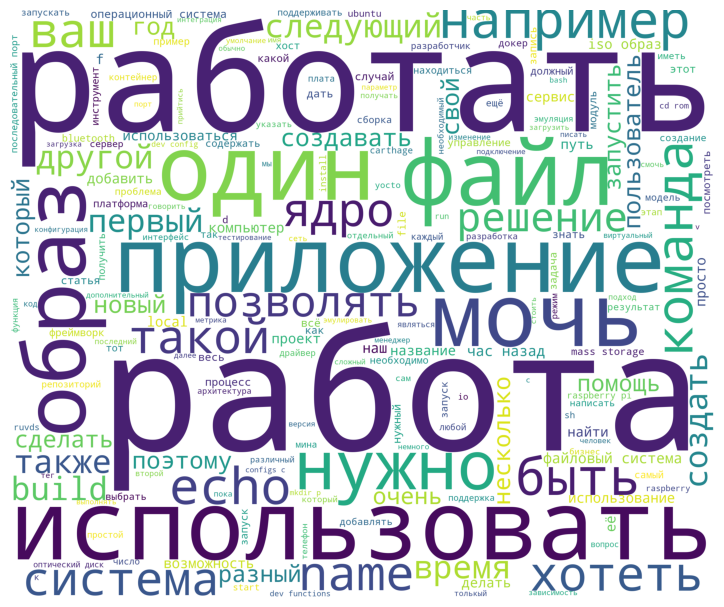

In [13]:
corpus = get_corpus(df['text_lemm_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

## –û–±–ª–∞–∫–æ —Å–ª–æ–≤ —Å—Ç–µ–º–º–∏–Ω–≥–æ–≤–∞–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞

<Axes: >

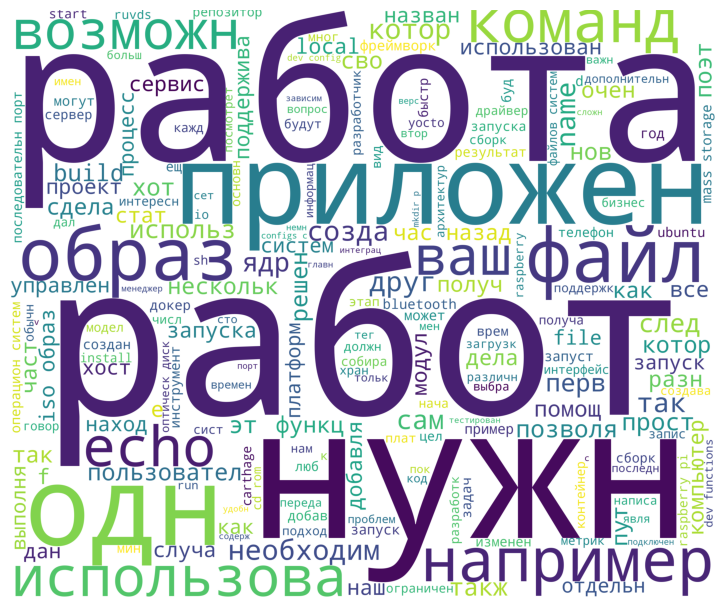

In [14]:

corpus = get_corpus(df['text_stem_clear'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [15]:
def tokenize2(text):
    if isinstance(text, list):  
        return text  
    if not isinstance(text, str):  
        return []  
    
    tokens = word_tokenize(text.lower(), language='russian')
    tokens = [token for token in tokens 
              if token not in russian_stopwords and len(token) >= 2]
    return tokens  

In [16]:
import gensim

df['text_stem_clear_tokenize'] = [tokenize2(text) for text in df['text_stem_clear']]
df['text_lemm_clear_tokenize'] = [tokenize2(text) for text in df['text_lemm_clear']]


gensim_dictionary1 = gensim.corpora.Dictionary(df['text_lemm_clear_tokenize'])
gensim_dictionary1.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary1.compactify()

gensim_dictionary2 = gensim.corpora.Dictionary(df['text_stem_clear_tokenize'])
gensim_dictionary2.filter_extremes(no_above=0.5, no_below=5)
gensim_dictionary2.compactify()




corpus2 = [gensim_dictionary1.doc2bow(text) 
          for text in df['text_lemm_clear_tokenize']]       # –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ–ø–∏—Å–∞–Ω–∏—è —Å—Ç–∞—Ç–µ–π

corpus3 = [gensim_dictionary2.doc2bow(text) 
          for text in df['text_stem_clear_tokenize']]       # –æ–ø–∏—Å–∞–Ω–∏—è —Å—Ç–∞—Ç–µ–π –ø–æ—Å–ª–µ —Å—Ç–µ–º–º–∏–Ω–≥–∞



In [17]:
lda_20 = gensim.models.LdaMulticore(corpus2, 
                                 num_topics=10, 
                                 id2word=gensim_dictionary1, 
                                 passes=10, random_state=6457)

lda_20.print_topics()

[(0,
  '0.031*"name" + 0.030*"–æ–±—Ä–∞–∑" + 0.019*"—Ñ–∞–π–ª" + 0.019*"sh" + 0.019*"build" + 0.019*"–Ω—É–∂–Ω–æ" + 0.014*"ip" + 0.014*"run" + 0.013*"—Å–µ—Ç–µ–≤–æ–π" + 0.011*"—Å–ª—É—á–∞–π"'),
 (1,
  '0.032*"–æ–±—Ä–∞–∑" + 0.032*"—Ñ–∞–π–ª" + 0.022*"–∫–æ–º–ø—å—é—Ç–µ—Ä" + 0.017*"–ø–æ—Ä—Ç" + 0.016*"—è–¥—Ä–æ" + 0.015*"—Å–ª—É–∂–±–∞" + 0.015*"–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ" + 0.015*"–ø–æ–∑–≤–æ–ª—è—Ç—å" + 0.014*"–Ω–µ–æ–±—Ö–æ–¥–∏–º–æ" + 0.014*"—Å–¥–µ–ª–∞—Ç—å"'),
 (2,
  '0.026*"–±–∏–∑–Ω–µ—Å" + 0.022*"—Å–µ—Ä–≤–∏—Å" + 0.019*"–∏–Ω–¥—É—Å—Ç—Ä–∏—è" + 0.017*"—Ö–∞–±—Ä–∞" + 0.016*"—Å–ª–æ–≤–æ" + 0.014*"–ø—Ä–æ–≥—Ä–∞–º–º–∏—Ä–æ–≤–∞–Ω–∏–µ" + 0.014*"–ø–∏—Å–∞—Ç—å" + 0.013*"–≤–∞–∫–∞–Ω—Å–∏—è" + 0.012*"—á–∞—Å" + 0.011*"–±–∞–Ω–∫"'),
 (3,
  '0.035*"json" + 0.031*"api" + 0.027*"https" + 0.020*"–≤–æ–ø—Ä–æ—Å" + 0.019*"—ç—Ç–∞–ø" + 0.017*"com" + 0.016*"–Ω–µ—Å–∫–æ–ª—å–∫–æ" + 0.012*"—Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫" + 0.012*"—Å–∫–∞–∑–∞—Ç—å" + 0.012*"–æ—Ç–≤–µ—Ç"'),
 (4,
  '0.030*"–ø—Ä–æ—Ü–µ—Å—Å–æ—Ä" + 0.027*"—á–∏—Å–ª–æ" + 0.020*"–æ–±–ª–∞—á–Ω—ã–π" 

In [18]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [19]:
vis_20 = gensimvis.prepare(lda_20, corpus2, gensim_dictionary1)

pyLDAvis.enable_notebook()

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=62707) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=62707) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=62707) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=62707) is multi-threaded, use of fork() may lead to deadlocks in the child.

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning:

This process (pid=62707) is multi-threaded, use of fork

# LDA –¥–ª—è habr —Å—Ç–∞—Ç–µ–π

In [20]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.142368  0.024774       1        1  25.706639
1      0.187280 -0.001947       2        1  23.180440
8     -0.077551  0.029936       3        1  13.240950
6      0.015539  0.180429       4        1   9.942505
9      0.040731 -0.132634       5        1   8.710484
3      0.031090 -0.024183       6        1   6.533580
5     -0.086770 -0.151385       7        1   5.148681
2     -0.181259  0.054736       8        1   4.829984
4     -0.065045  0.009807       9        1   2.681623
7     -0.006383  0.010468      10        1   0.025113, topic_info=           Term        Freq       Total Category  logprob  loglift
9          name   84.000000   84.000000  Default  30.0000  30.0000
236       –æ–±—Ä–∞–∑  146.000000  146.000000  Default  29.0000  29.0000
277  –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ   97.000000   97.000000  Default  28.0000  28.0000
203   –∫–æ–º–ø—å—é—Ç–µ—Ä   51.000000   51.000000  Default  27.0000  27.0000
8          json   34.000000   34.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
60          –∫–æ–¥    0.004796   48.486454  Topic10  -6.2000  -0.9316
450       —á–∏—Å–ª–æ    0.004725   25.689753  Topic10  -6.2150  -0.3114
303      —Å–±–æ—Ä–∫–∞    0.004733   33.863479  Topic10  -6.2132  -0.5859
168   –¥–æ–±–∞–≤–ª—è—Ç—å    0.004713   30.185726  Topic10  -6.2176  -0.4753
260   –ø–æ–∑–≤–æ–ª—è—Ç—å    0.004736   63.776577  Topic10  -6.2127  -1.2184

[528 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         3  0.654543        ai
0         6  0.218181        ai
0         9  0.109090        ai
128       2  0.633983   android
128       3  0.211328   android
...     ...       ...       ...
127       9  0.078642  —è–≤–ª—è—Ç—å—Å—è
356       1  0.406402      —è–¥—Ä–æ
356       2  0.547080      —è–¥—Ä–æ
356       5  0.015631      —è–¥—Ä–æ
356       7  0.015631      —è–¥—Ä–æ

[1527 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 9, 7, 10, 4, 6, 3, 5, 8])

# –û—Ü–µ–Ω–∫–∞ CoherenceModel

In [21]:
from gensim.models import CoherenceModel

coherence_model_habr = CoherenceModel(model=lda_20,
                                 texts=df['text_lemm_clear_tokenize'],
                                 dictionary=gensim_dictionary1,
                                 coherence="c_v")


coherence_value_habr = coherence_model_habr.get_coherence()


print(f"–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π: {coherence_value_habr}")


–ö–æ–≥–µ—Ä–µ–Ω—Ç–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ —Å—Ç–∞—Ç–µ–π: 0.4056956637254978


# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

print(vectorizer.vocabulary_)


{'—Å—Ç–∞—Ç—å': 5191, '–∞–≤—Ç–æ—Ä': 1652, '–∏–¥–µ—è': 2644, '–ø–æ—á–µ–º—É': 4235, '–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å': 2755, '–≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å': 1988, 'chatgpt': 204, '–ø–æ–ø—Ä–æ—Å–∏—Ç—å': 4168, '–¥–µ–ª–∞—Ç—å': 2266, '–Ω–∞–ø—Ä–∏–º–µ—Ä': 3296, '–¥–∞–≤–∞—Ç—å': 2225, '–ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å': 4167, '–Ω–∞—Å—Ç—Ä–æ–∏—Ç—å': 3308, '–º–æ—á—å': 3215, '–∑–∞–±—Ä–æ–Ω–∏—Ä–æ–≤–∞—Ç—å': 2456, '–º—ã': 3226, '—Å—Ç–æ–ª–∏–∫': 5206, '–Ω–∞—à': 3333, '–ª—é–±–∏–º—ã–π': 3047, '—Ä–µ—Å—Ç–æ—Ä–∞–Ω': 4763, '—Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è': 4711, '—à–∞–≥': 5751, '–∏–Ω—Ç–µ–≥—Ä–∞—Ü–∏—è': 2716, 'whatapp': 1489, '–ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º': 4285, '–∏–∑–≤–µ—Å—Ç–Ω—ã–π': 2650, '–Ω–æ–º–µ—Ä': 3442, 'whatsapp': 1490, '–±—Ä–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ': 1835, '–ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è': 4153, '—Å–µ—Ä–≤–∏—Å': 4901, '–∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π': 1649, '–æ—Ç–ø—Ä–∞–≤–∫–∞': 3758, '–ø—Ä–∏—ë–º': 4400, '—Å–æ–æ–±—â–µ–Ω–∏–µ': 5065, '—Ç–∞–∫–æ–π': 5281, '–ø—Ä–∏–º–µ—Ä': 4364, '–≤–∑—è—Ç—å': 1926, 'https': 616, 'wazzup': 1479, 'com': 238, '–±–µ—Å–ø–ª–∞—Ç–Ω—ã–π': 17

In [23]:
vectorizer.get_feature_names_out()[10:20]

array(['actionbuttons', 'actions', 'actual', 'adam', 'adapter', 'add',
       'addr', 'address', 'admin', 'adriver'], dtype=object)

In [24]:
from gensim.utils import simple_preprocess

def text_to_vector(text, model):
    words = simple_preprocess(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

In [25]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)


df['text_lemm_clear_str'] = df['text_lemm_clear_tokenize'].apply(' '.join)
df['text_stem_clear_str'] = df['text_stem_clear_tokenize'].apply(' '.join)

count_matrix_lemm = vectorizer.fit_transform(df['text_lemm_clear_str'])
count_matrix_stem = vectorizer.fit_transform(df['text_stem_clear_str'])

count_matrix_lemm.shape

(24, 8521)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))



tfidf_matrix_lemm = tfidf_vectorizer.fit_transform(df['text_lemm_clear_str'])
tfidf_matrix_stem = tfidf_vectorizer.fit_transform(df['text_stem_clear_str'])



In [27]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np

model = KeyedVectors.load_word2vec_format('/Users/aror/Documents/proj/ml/GoogleNews-vectors-negative300.bin', binary=True)

print(f"words: {len(model.key_to_index)}")

words: 3000000


In [28]:
w2v_model_lemm = Word2Vec(sentences=[text.split() for text in df['text_lemm_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)

w2v_model_stem = Word2Vec(sentences=[text.split() for text in df['text_stem_clear_str']],
                    vector_size=300, window=5, min_count=10, workers=4)


w2v_matrix_lemm = np.array([text_to_vector(text, w2v_model_lemm) for text in df['text_lemm_clear_str']])
w2v_matrix_stem = np.array([text_to_vector(text, w2v_model_stem) for text in df['text_stem_clear_str']])

tfidf_matrix_stem.shape

(24, 10000)

In [29]:
print("TF-IDF samples:", tfidf_matrix_lemm.shape[0])
print("Word2Vec samples:", w2v_matrix_lemm.shape[0])

TF-IDF samples: 24
Word2Vec samples: 24


## 2d –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ 

In [30]:
from sklearn.manifold import TSNE
def plot_tsne_optimized(X, title, texts, perplexity=None, text_length=20):
    n_samples = X.shape[0]
    
    if perplexity is None:
        perplexity = min(5, n_samples - 1)  
    
    if hasattr(X, 'toarray'):
        X = X.toarray()
    
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        random_state=42,
        learning_rate=50, 
        init='pca'  
    )
    
    X_2d = tsne.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7)
    
    for i, (x, y) in enumerate(X_2d):
        plt.annotate(
            str(texts[i])[:text_length] + ("..." if len(str(texts[i])) > text_length else ""), 
            (x, y),
            fontsize=8,
            alpha=0.8,
            xytext=(10, 10),
            textcoords='offset points'
        )
    
    plt.title(f"{title}\nperplexity={perplexity}, n_samples={n_samples}")
    plt.grid(True, alpha=0.2)
    plt.show()


In [31]:
def tokenize_desc(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens


# –†–∞–∑–º–µ—â–µ–Ω–∏–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ —Å—Ç–∞—Ç–µ–π habr –Ω–∞ 2–¥ –ø–ª–æ—Å–∫–æ—Å—Ç–∏

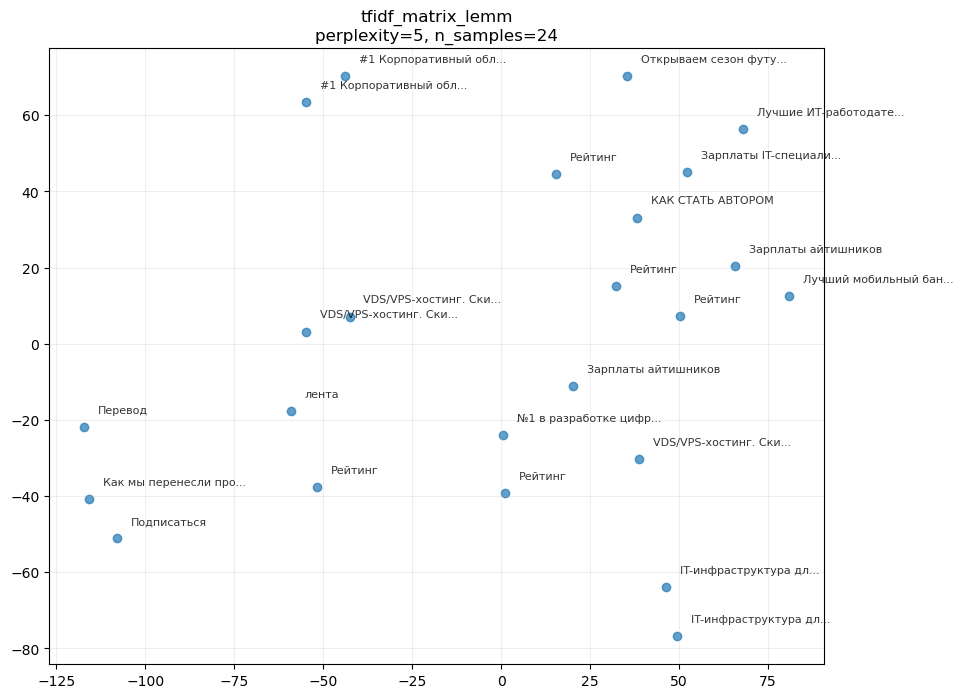

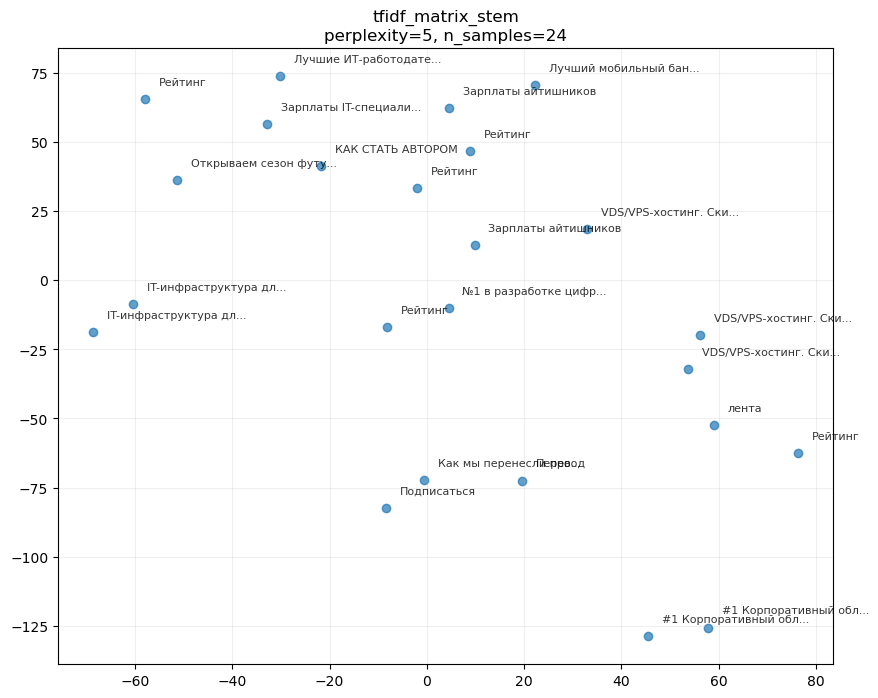

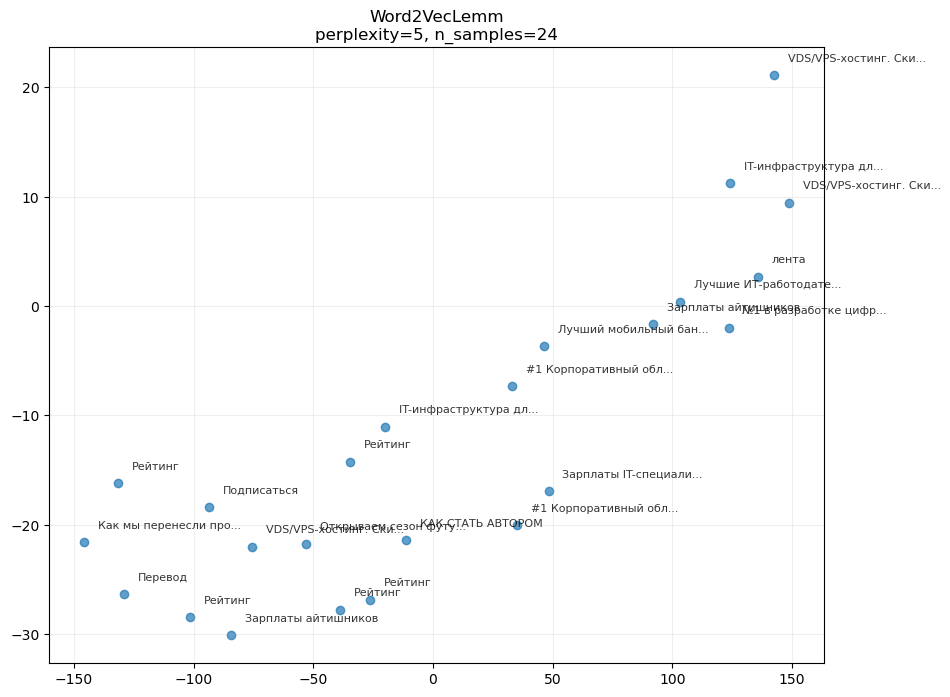

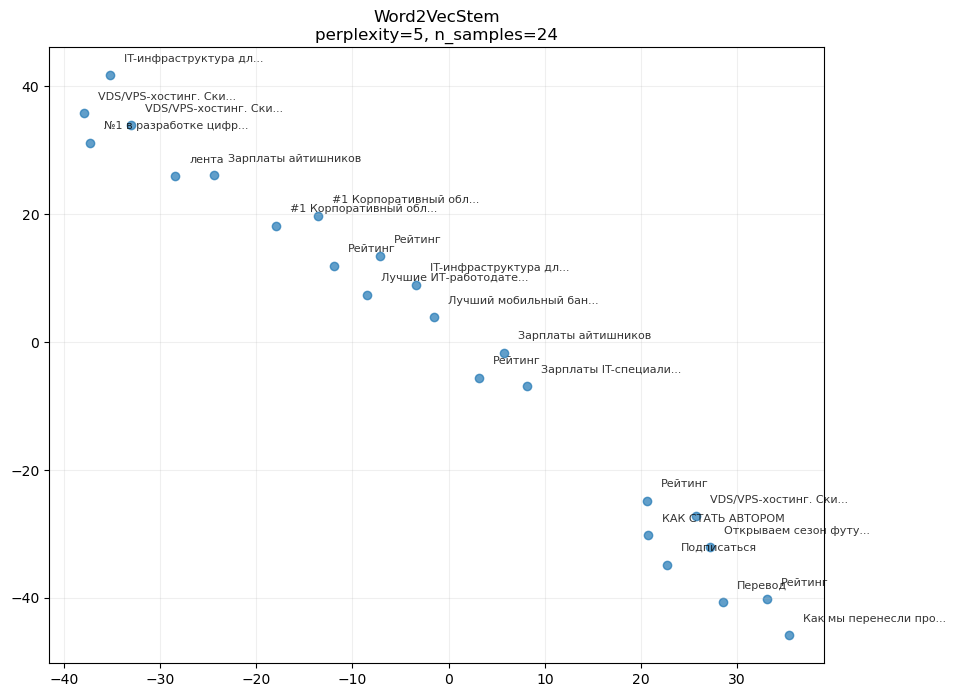

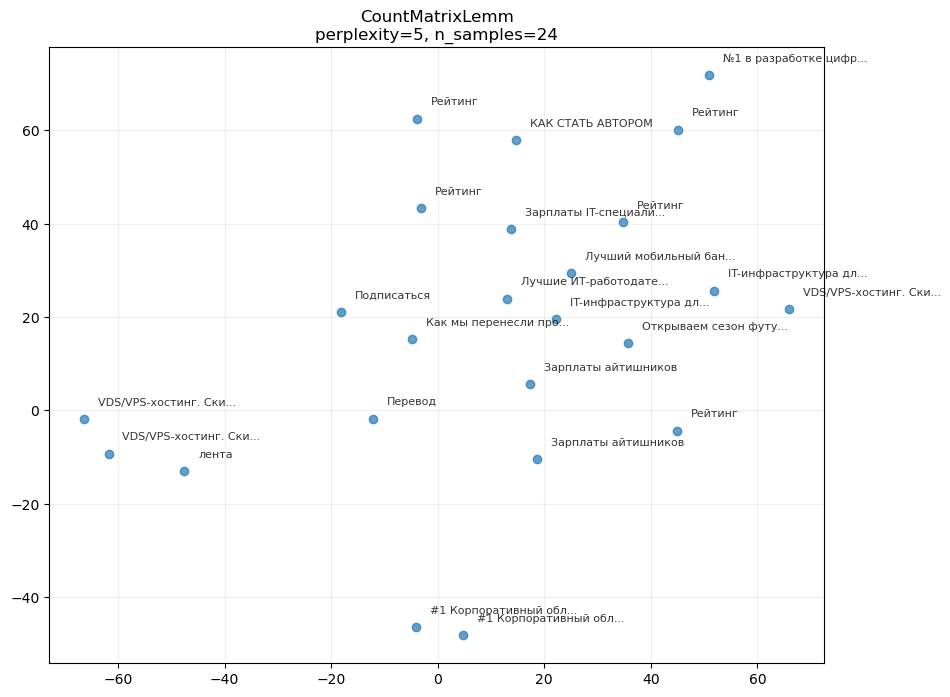

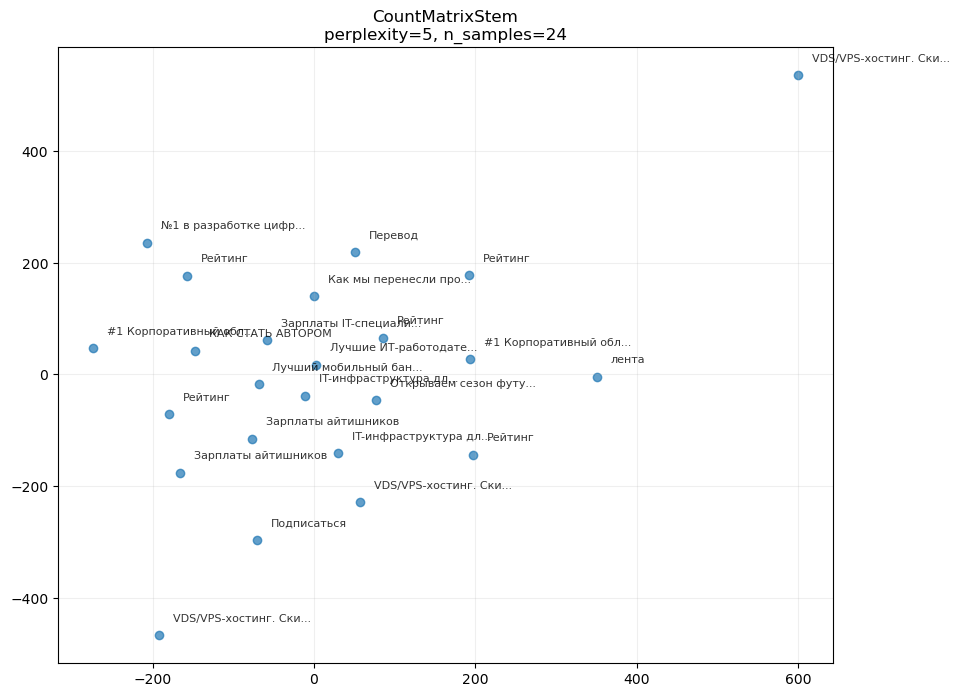

In [32]:
plot_tsne_optimized(tfidf_matrix_lemm, "tfidf_matrix_lemm", texts=df['Activity'].tolist())
plot_tsne_optimized(tfidf_matrix_stem, "tfidf_matrix_stem",texts=df['Activity'].tolist())
plot_tsne_optimized(w2v_matrix_lemm, "Word2VecLemm",texts=df['Activity'].tolist())
plot_tsne_optimized(w2v_matrix_stem, "Word2VecStem",texts=df['Activity'].tolist())
plot_tsne_optimized(count_matrix_lemm, 'CountMatrixLemm', texts=df['Activity'].tolist())
plot_tsne_optimized(count_matrix_stem, 'CountMatrixStem', texts=df['Activity'].tolist())

## –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è Kmeans –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ tfid, countMatrix, word2vec

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=42)

tfid_labels_lemm = kmeans.fit_predict(tfidf_matrix_lemm)  
tfid_labels_stem = kmeans.fit_predict(tfidf_matrix_stem) 

silhouette_tfid_lemm = silhouette_score(tfidf_matrix_lemm, tfid_labels_lemm)
silhouette_tfid_stem = silhouette_score(tfidf_matrix_stem, tfid_labels_stem)

In [34]:
word2vec_labels_lemm = kmeans.fit_predict(w2v_matrix_lemm)  
word2vec_labels_stem = kmeans.fit_predict(w2v_matrix_stem) 

silhouette_word2vec_lemm = silhouette_score(w2v_matrix_lemm, word2vec_labels_lemm)
silhouette_word2vec_stem = silhouette_score(w2v_matrix_stem, word2vec_labels_stem)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Å—Ç–∞—Ç–µ–π Habr

In [35]:
count_matrix_lemm_lables = kmeans.fit_predict(count_matrix_lemm)  
count_matrix_stem_lables = kmeans.fit_predict(count_matrix_stem) 

silhouette_count_matrix_lemm = silhouette_score(count_matrix_lemm, count_matrix_lemm_lables)
silhouette_count_matrix_stem = silhouette_score(count_matrix_stem, count_matrix_stem_lables)

In [36]:
import seaborn as sns

classifiers =["word2vec lemm", "word2vec stem", "count_matrix_lemm", "count_matrix_stem", "tfid_lemm", "tfid_stem"]
log_cols = ["Classifier","Silhoette score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Silhoette score"] = [silhouette_word2vec_lemm, silhouette_word2vec_stem, silhouette_count_matrix_lemm, silhouette_count_matrix_stem, silhouette_tfid_lemm, silhouette_tfid_stem]


In [37]:
log

Classifier  Silhoette score
0      word2vec lemm         0.398222
1      word2vec stem         0.464512
2  count_matrix_lemm         0.262463
3  count_matrix_stem         0.268375
4          tfid_lemm         0.110728
5          tfid_stem         0.110501

<Axes: title={'center': 'Vector'}, xlabel='Silhoette score', ylabel='Classifier'>

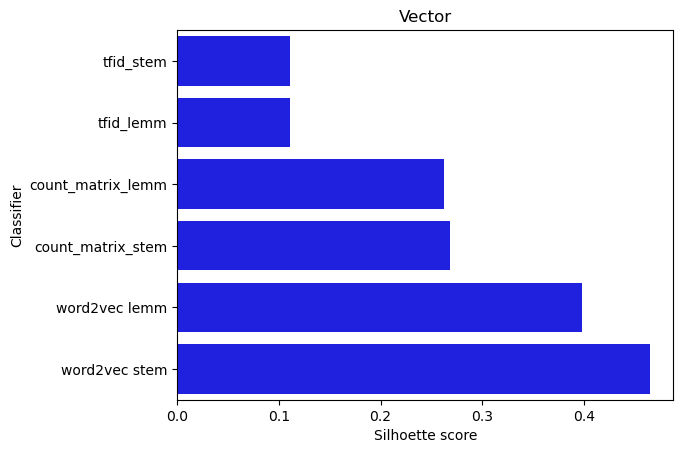

In [38]:

plt.xlabel('Silhoette score')
plt.title('Vector')

sns.barplot(x='Silhoette score', y='Classifier', data=log.sort_values(by='Silhoette score'), color="b")